<a href="https://colab.research.google.com/github/shubhammadane/pandas-by-shubhammadane/blob/main/Data%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os

# Input folder
input_folder = "/content/"
output_folder = "/content/augmented/"
os.makedirs(output_folder, exist_ok=True)

# Augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5,1.5],
    fill_mode='nearest'
)

# Generate images
for img_name in os.listdir(input_folder):
    # Added .jpeg to the supported extensions
    if img_name.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(input_folder, img_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)

        i = 0
        for batch in datagen.flow(x,
                                 batch_size=1,
                                 save_to_dir=output_folder,
                                 save_prefix="LeafBlast",
                                 save_format="jpg"):
            i += 1
            if i >= 150:   # per image 150 images
                break

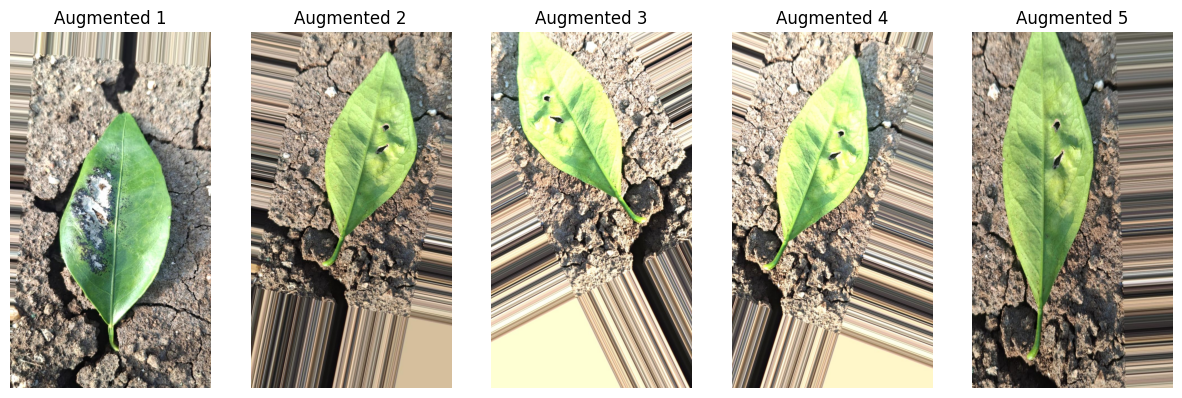

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to augmented images
output_folder = "/content/augmented/"
aug_images = [os.path.join(output_folder, img) for img in os.listdir(output_folder) if img.endswith('.jpg')]

# Display the first 5 images
plt.figure(figsize=(15, 10))
for i in range(min(5, len(aug_images))):
    plt.subplot(1, 5, i + 1)
    img = mpimg.imread(aug_images[i])
    plt.imshow(img)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')
plt.show()